In [1]:
from jax.lib import xla_bridge
print(xla_bridge.get_backend().platform)

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


cpu


In [2]:
%load_ext autoreload
%autoreload 2
%pylab inline

import tensorflow as tf 
import numpy as np
from chainconsumer import ChainConsumer
import cmasher as cmr

'unset XLA_FLAGS'


Populating the interactive namespace from numpy and matplotlib


2023-05-24 14:29:07.856210: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/gpfslocalsup/pub/anaconda-py3/2021.05/envs/python-3.10.4/lib/python3.10/site-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.14) or chardet (5.1.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


'unset XLA_FLAGS'

## Load data

In [3]:
import pickle
with open("/gpfsdswork/projects/rech/ykz/ulm75uc/VMIM-vs-MSE-/data/sample_nd_mse.pkl", 'rb') as g:
    sample_nd_mse = pickle.load(g)
    
    
with open("/gpfsdswork/projects/rech/ykz/ulm75uc/VMIM-vs-MSE-/data/sample_nd_vmim.pkl", 'rb') as g:
    sample_nd_vmim = pickle.load(g)
    
    
with open("/gpfsdswork/projects/rech/ykz/ulm75uc/VMIM-vs-MSE-/data/loss_mse.pkl", 'rb') as g:
    loss_mse = pickle.load(g)
    
    
with open("/gpfsdswork/projects/rech/ykz/ulm75uc/VMIM-vs-MSE-/data/loss_vmim.pkl", 'rb') as g:
    loss_vmim = pickle.load(g)

In [4]:
col = cmr.eclipse([0.,0,0.55,0.85]) 
fid_params=np.array([0.2664, 0.0492, 0.831,0.6727,0.9645, -1.0])
name_parameters= ['$\Omega_c$', '$\Omega_b$', '$\sigma_8$', '$h_0$', '$n_s$', '$w_0$']

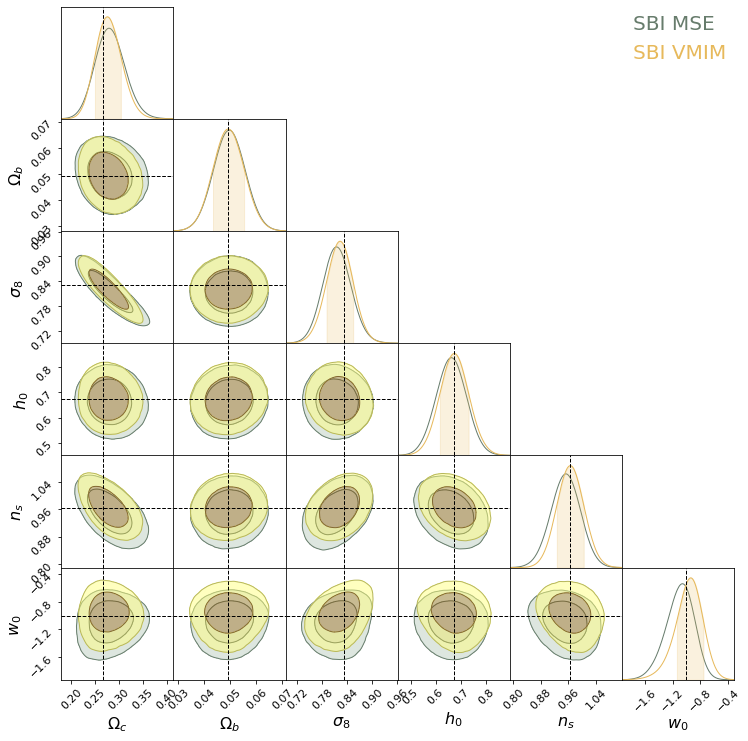

In [5]:
c = ChainConsumer()
c.add_chain([sample_nd_mse[:,i] for i in range(6)], parameters= name_parameters, name = 'SBI MSE')
c.add_chain([sample_nd_vmim[:,i] for i in range(6)], parameters= name_parameters, name = 'SBI VMIM')
c.configure(usetex=False,legend_kwargs={'fontsize': 20},linewidths=[1., 1.0], shade=[True, True],linestyles=["-", "-"], shade_alpha=[0.3, 0.5], bar_shade=[False,True], tick_font_size=11, colors=[col[2],col[3]], label_font_size=16)
fig = c.plotter.plot(truth=fid_params)
fig.set_size_inches(2 + fig.get_size_inches())
plt.savefig('contours_mse_vmim.png',dpi=250)

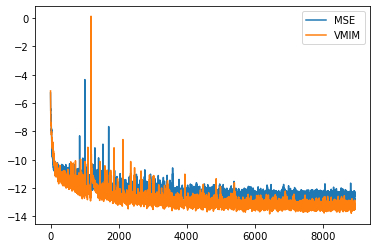

In [6]:
plt.plot(loss_mse, label='MSE')
plt.plot(loss_vmim, label='VMIM')
legend()

In [10]:
sample_ff=np.load("/gpfsdswork/projects/rech/ykz/ulm75uc/VMIM-vs-MSE-/script/posterior_full_field__256N_10ms_27gpa_0.26se.npy",allow_pickle=True)

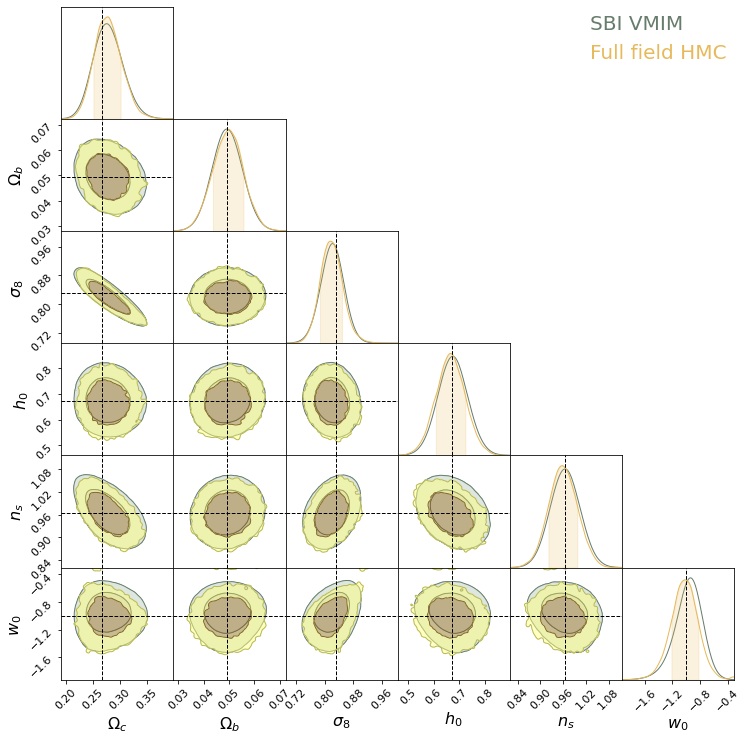

In [11]:
c = ChainConsumer()
c.add_chain([sample_nd_vmim[:,i] for i in range(6)], parameters= name_parameters, name = 'SBI VMIM')
c.add_chain([sample_ff[:,i] for i in range(6)], parameters= name_parameters, name = 'Full field HMC')
c.configure(usetex=False,legend_kwargs={'fontsize': 20},linewidths=[1., 1.0], shade=[True, True],linestyles=["-", "-"], shade_alpha=[0.3, 0.5], bar_shade=[False,True], tick_font_size=11, colors=[col[2],col[3]], label_font_size=16)
fig = c.plotter.plot(truth=fid_params)
fig.set_size_inches(2 + fig.get_size_inches())


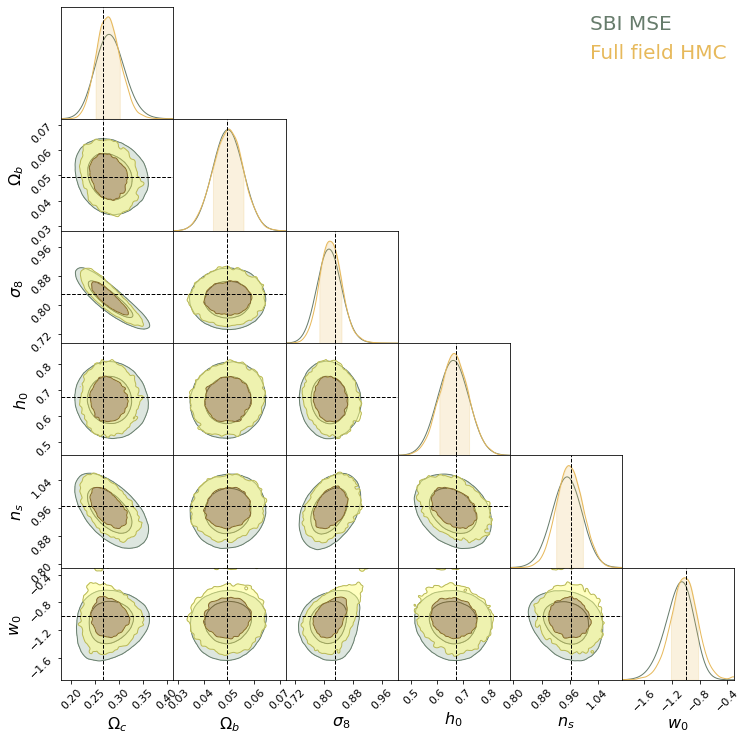

In [12]:
c = ChainConsumer()
c.add_chain([sample_nd_mse[:,i] for i in range(6)], parameters= name_parameters, name = 'SBI MSE')
c.add_chain([sample_ff[:,i] for i in range(6)], parameters= name_parameters, name = 'Full field HMC')
c.configure(usetex=False,legend_kwargs={'fontsize': 20},linewidths=[1., 1.0], shade=[True, True],linestyles=["-", "-"], shade_alpha=[0.3, 0.5], bar_shade=[False,True], tick_font_size=11, colors=[col[2],col[3]], label_font_size=16)
fig = c.plotter.plot(truth=fid_params)
fig.set_size_inches(2 + fig.get_size_inches())
